In [18]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [19]:
start = "2000-01-01"
end = datetime.datetime.today().strftime("%Y-%m-%d")

ticker = "^GSPC"

data = yf.download(ticker, start=start, end=end)

print(data.head())

C:\Users\cauch\AppData\Local\Temp\ipykernel_2596\2510294644.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000


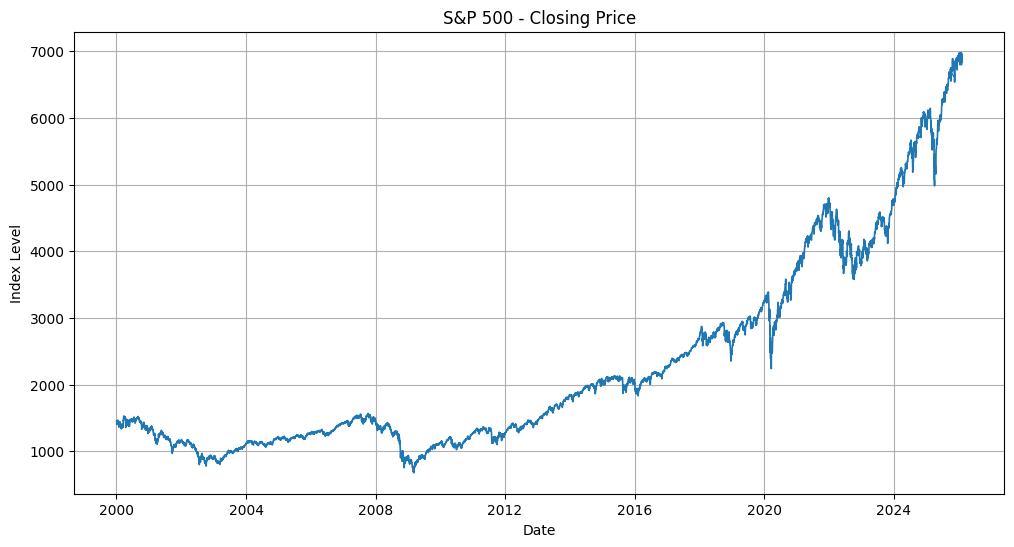

In [20]:
# Création du graphique
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], linewidth=1.2)

plt.title("S&P 500 - Closing Price")
plt.xlabel("Date")
plt.ylabel("Index Level")
plt.grid(True)

plt.show()

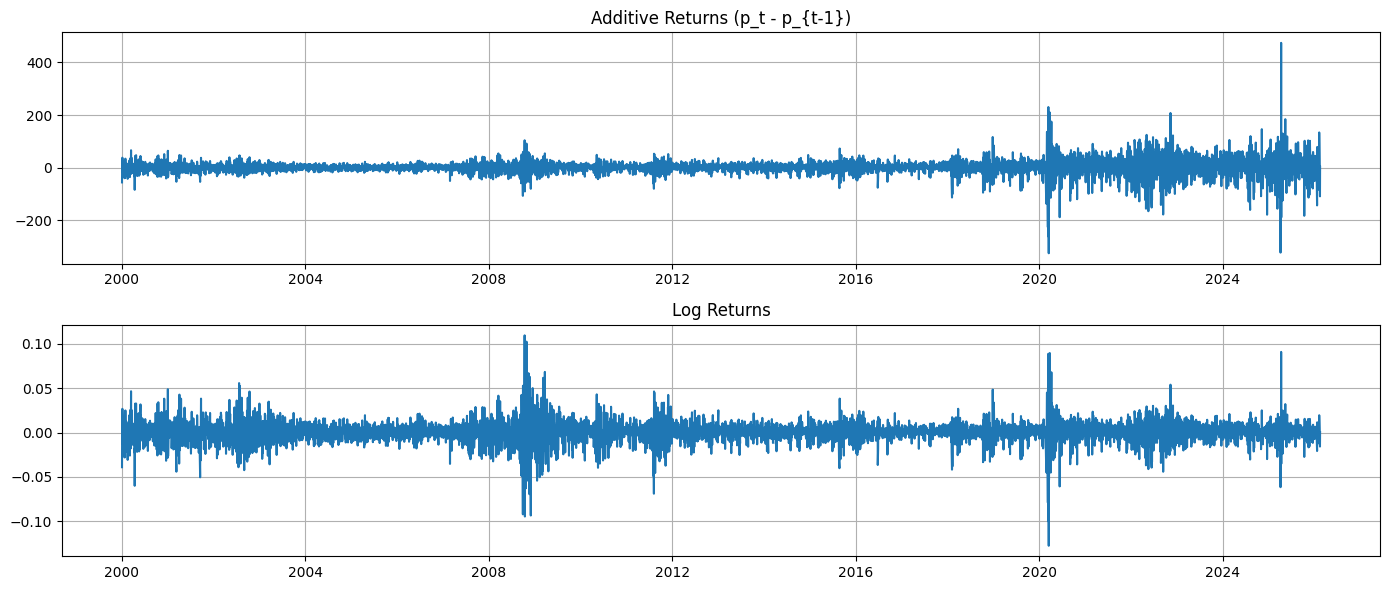

In [21]:
data["a_returns"] = data["Close"] - data["Close"].shift(1)
data["l_returns_1"] = np.log(data["Close"]/data["Close"].shift(1))
data = data.dropna()

plt.figure(figsize=(14,6))

plt.subplot(2,1,1)
plt.plot(data.index, data["a_returns"])
plt.title("Additive Returns (p_t - p_{t-1})")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(data.index, data["l_returns_1"])
plt.title("Log Returns")
plt.grid(True)

plt.tight_layout()
plt.show()

log returns : $r_t = \text{log} \left( \frac{p_t}{p_{t-1}} \right) = \text{log} \left( 1 + \frac{p_t-p_{t-1}}{p_{t-1}} \right)$

additive returns : $r_t = p_t - p_{t-1}$

We notice that log returns are more stable than additive returns.

Variogram : $V(\tau) = \left\langle \log \left( \frac{p_t}{p_{t-\tau}} \right)^2 \right\rangle$

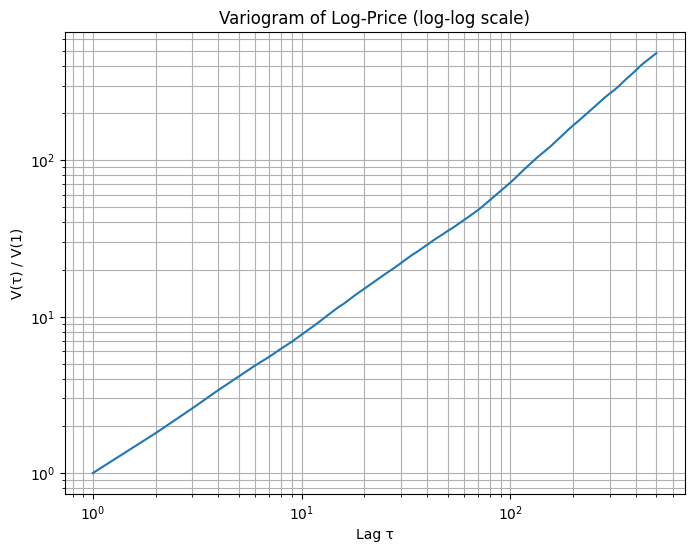

In [24]:
V = []
max_lags = 500
p = data["Close"].values
logp = np.log(p)
for tau in range(1, max_lags+1):
    diffs = logp[tau:] - logp[:-tau]
    V.append(np.mean(diffs**2))

V_normalized = V / V[0]
taus = np.arange(1, max_lags+1)

plt.figure(figsize=(8,6))
plt.loglog(taus, V_normalized)
plt.xlabel("Lag τ")
plt.ylabel("V(τ) / V(1)")
plt.title("Variogram of Log-Price (log-log scale)")
plt.grid(True, which="both")
plt.show()

In [31]:
def r_scale(delta):
    return (np.log(data["Close"]) - np.log(data["Close"].shift(delta))).dropna()

r1 = r_scale(1)
r250 = r_scale(250)

print(r1.mean().iloc[0] * 250, r1.std().iloc[0] * np.sqrt(250))
print(r250.mean().iloc[0], r250.std().iloc[0])

0.060384107103342466 0.19273240178854725
0.058810667498227547 0.169638469839719
